<a href="https://colab.research.google.com/github/rasulmohammad/RiskDetectionPregnancyML/blob/main/APResearchTraining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **Welcome to my project**


# **Loading Dataset**


In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/rasulmohammad/Datasets/main/Maternal_Health_Risk.csv')
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


# **Data Preparation**

## **Parsing risk level -> integers**

In [2]:
parsed_risk = {
    'high risk': 2,
    'mid risk' : 1,
    'low risk' : 0
}

df = df.replace({"RiskLevel" : parsed_risk})
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,2
1,35,140,90,13.0,98.0,70,2
2,29,90,70,8.0,100.0,80,2
3,30,140,85,7.0,98.0,70,2
4,35,120,60,6.1,98.0,76,0
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,2
1010,55,120,90,18.0,98.0,60,2
1011,35,85,60,19.0,98.0,86,2
1012,43,120,90,18.0,98.0,70,2


Some entries in the dataset go as young as 14 years old, so we're going to exclude these in our training


In [3]:
df = df[df["Age"] > 14]

df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,2
1,35,140,90,13.0,98.0,70,2
2,29,90,70,8.0,100.0,80,2
3,30,140,85,7.0,98.0,70,2
4,35,120,60,6.1,98.0,76,0
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,2
1010,55,120,90,18.0,98.0,60,2
1011,35,85,60,19.0,98.0,86,2
1012,43,120,90,18.0,98.0,70,2


## **Separating into X and Y**


In [4]:
y = df["RiskLevel"]
y

0       2
1       2
2       2
3       2
4       0
       ..
1009    2
1010    2
1011    2
1012    2
1013    1
Name: RiskLevel, Length: 960, dtype: int64

In [5]:
x = df.drop("RiskLevel", axis=1)
x

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,25,130,80,15.0,98.0,86
1,35,140,90,13.0,98.0,70
2,29,90,70,8.0,100.0,80
3,30,140,85,7.0,98.0,70
4,35,120,60,6.1,98.0,76
...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80
1010,55,120,90,18.0,98.0,60
1011,35,85,60,19.0,98.0,86
1012,43,120,90,18.0,98.0,70


## **Data Splitting**

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [7]:
x_train

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
10,23,90,60,7.01,98.0,76
808,23,120,90,7.90,98.0,70
950,23,120,80,7.50,98.0,70
381,23,120,90,7.80,98.0,60
200,32,120,90,7.50,98.0,70
...,...,...,...,...,...,...
901,50,120,80,7.90,98.0,70
917,60,90,65,7.50,98.0,77
881,15,120,80,6.80,98.0,70
834,17,90,65,7.50,103.0,67


In [8]:
x_test

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
737,17,120,80,6.7,102.0,76
476,15,76,49,7.9,98.0,77
228,48,120,80,11.0,98.0,88
402,35,100,70,7.8,98.0,60
611,23,120,90,7.5,98.0,60
...,...,...,...,...,...,...
108,42,140,100,18.0,98.0,90
105,34,85,60,11.0,102.0,86
509,17,90,60,7.5,101.0,76
211,35,100,70,7.0,98.0,60


In [9]:
y_train

10     0
808    1
950    0
381    1
200    0
      ..
901    0
917    0
881    0
834    1
547    0
Name: RiskLevel, Length: 768, dtype: int64

In [10]:
y_test

737    1
476    0
228    2
402    0
611    0
      ..
108    2
105    2
509    0
211    0
594    2
Name: RiskLevel, Length: 192, dtype: int64

# **Model Building**

## **Linear Regression**

**Training the model (80% of our data)**


In [11]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

**Applying the model to make a prediction**

In [12]:
# "y linear regression training prediction" : reference
y_lr_train_pred = lr.predict(x_train)

y_lr_test_pred = lr.predict(x_test)

In [13]:
y_lr_train_pred

array([ 0.27635   ,  0.75088696,  0.67538991,  0.62541291,  0.69626273,
        0.70067985,  0.5520868 ,  0.53512555,  0.51736087,  0.05228232,
        0.34854154,  0.84593925,  0.58560945,  1.15883075,  0.32651303,
        0.20869777,  0.62449821,  1.21221446,  0.41116625,  0.88160443,
        1.82163439,  0.58749409,  0.68179819,  0.98639901,  0.73498119,
        0.15688273,  0.85508403,  0.64953709,  2.34330568,  1.73965845,
        0.58977456,  0.77609062,  0.54972232,  0.68179819,  0.33109619,
        0.31240886,  0.86812031,  0.75694719,  0.79101044,  1.31157276,
        2.3006964 ,  0.51736087,  1.26448417,  1.79550556,  0.15317901,
        0.31551071,  0.35987282,  0.90225095,  1.24094292,  1.24094292,
        2.54183058,  0.82303357,  0.5742669 ,  1.09730431,  0.61432238,
        0.57190338,  0.66678462,  0.40517042,  1.12816266,  0.70103775,
        0.91044914,  0.62449821,  0.7463005 ,  1.15969598,  1.95550992,
        0.71257403,  0.78947267,  0.51736087,  0.39579004,  1.39

In [14]:
y_lr_test_pred

array([ 1.31458461,  0.19754113,  1.24094292,  0.31542251,  0.59214132,
        0.63743607,  0.0079202 ,  0.8186279 ,  0.65372544,  0.39579004,
        1.79550556,  2.42539495, -0.05670279,  0.89798797,  1.03656002,
        0.52568214,  0.87123268,  1.08380055,  0.44012568,  0.21921095,
        0.64460356,  0.39362254,  0.41214288,  0.58535839,  0.65125372,
        0.92016902,  0.65372544,  1.97033298,  0.50332309,  0.75721501,
        1.44653073,  2.54183058,  0.66773801,  0.49931086,  1.09730431,
        0.57190338,  0.51736087,  0.94593315,  0.60687809,  0.60687809,
        0.71844378,  2.32848262,  0.36680414,  1.03656002,  0.53289405,
        0.25003406,  0.20869777,  1.33562543,  1.01003312,  0.55453569,
        1.01688802,  0.55569612,  1.11513277,  1.36617486,  0.51736087,
        1.06571655,  1.28462044,  0.51279993,  1.55300504,  0.51736087,
        1.01003312,  0.55453569,  0.51736087,  0.51736087,  0.62449821,
        2.34558615,  0.77350937,  0.33109619,  0.84593925,  1.24

**Comparing model answers to real answers (performance)**

In [15]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [16]:
print("LR MSE (Training): ", lr_train_mse)
print("LR R2 (Training): ", lr_train_r2)
print("LR MSE (Testing): ", lr_test_mse)
print("LR R2 (Testing): ", lr_test_r2)

LR MSE (Training):  0.35288427971630937
LR R2 (Training):  0.45383797373517776
LR MSE (Testing):  0.35799640138269595
LR R2 (Testing):  0.47876380028548915


In [17]:
lr_results = pd.DataFrame(['Linear regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()  #allows us to be organized and compare different methods of training
lr_results.columns = ["Method", "Training MSE", "Training R2", "Test MSE", "Test R2"]

In [18]:
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,0.352884,0.453838,0.357996,0.478764


# **Data Visualization of Results**

# **Linear Regression**

note to self: need to choose a diff graph to display data

## **Training Sets Graph**

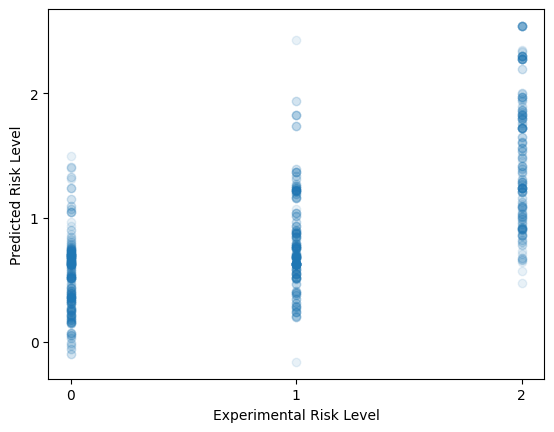

In [19]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(x=y_train, y=y_lr_train_pred, alpha = 0.1)

# Set ticks for x-axis
plt.xticks([0, 1, 2])

# Set ticks for y-axis
plt.yticks([0, 1, 2])

plt.ylabel("Predicted Risk Level")
plt.xlabel("Experimental Risk Level")

plt.show()

## **Test Sets Graph**

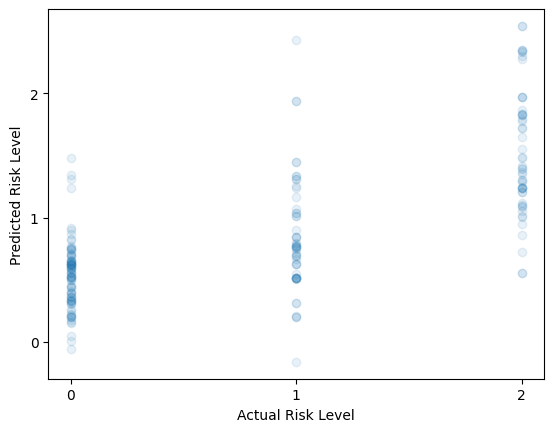

In [20]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(x=y_test, y=y_lr_test_pred, alpha = 0.1)

# Set ticks for x-axis
plt.xticks([0, 1, 2])

# Set ticks for y-axis
plt.yticks([0, 1, 2])

plt.ylabel("Predicted Risk Level")
plt.xlabel("Actual Risk Level")

plt.show()

# **K-NN**

## **Training Sets Graph**

## **Test Sets Graph**

# **Decision Tree**

## **Training *Sets* graph**

## **Test Sets Graph**

```
# This is formatted as code
```

